<a href="https://colab.research.google.com/github/lisawermers/MAT421/blob/main/MAT421ModuleHPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module H Part 2

**22.4: Numerical Error and Instability**

There are 2 big issues to consider with regards to integration schemes for ODEs: 

**Accuracy**: this refers to the schemes ability to get close to the exact solution as a function of the step size. 

**Stability**: this is the schemes ability to keep the error from growing as it integrates forward in time. If the error does *not* grow then it is considered **stable**. If it does, it's **unstable**. 

The following example (explicit/implicit Euler & trapezoidal used to solve a pendulum equation) illustrates issues of stability: 

<ipython-input-3-365267e82579>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


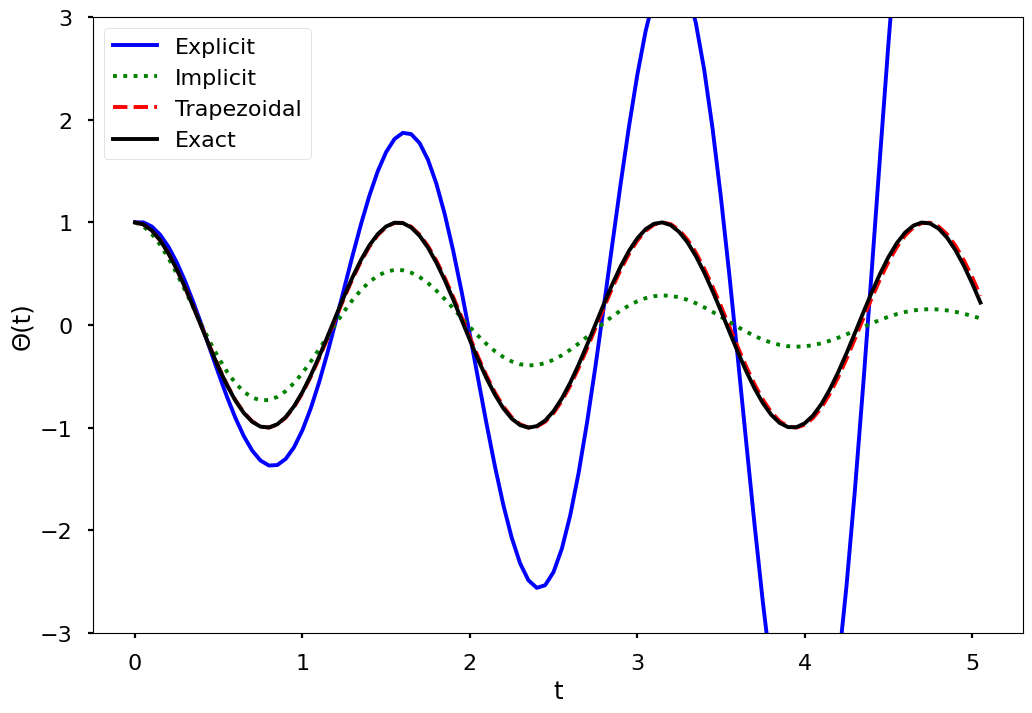

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('Θ(t)')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5: Predictor-Corrector and Runge Kutta Methods**

The **predictor-corrector** methods of solving IVPs improve the approximation accuracy of other methods. 

There are 2 formulas: the **predictor** and the **corrector**. 

EX: The Midpoint Method

**Predictor Step**: 

$S(t_j+\frac{h}{2}) = S(t_j) + \frac{h}{2}F(t_j,S(t_j))$

**Corrector Step**: 

$S(t_{j+1})=S(t_j)+hF(t_j+\frac{h}{2},S(t_j+\frac{h}{2}))$

The **Runge-Kutta** methods are very widely used for solving ODEs. It's based on truncated Taylor Series. 

$S(t_{j+1})=S(t_j)+\frac{1}{2}(k_1+k_2)h$

The most commonly used (to achieve a high level of accuracy) is the **Fourth Order Runge-Kutta (RK4)** which uses 4 points: 

$k_1 = F(t_j,S(t_j))$

$k_2 = F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h)$

$k_3 = F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h)$

$k_4 = F(t_j+h,S(t_j)+k_3h)$

**22.6: Python ODE Solvers**

SciPy has many built in functions to solve IVPs but the most common is: 

*scipy.integrate.solve_ivp*

When we call it it will look something like: 

*solve_ivp(fun,t_span,s0,method "RK45",t_eval=None)*

**fun**: takes the function on the RHS of the system

**t_span**: the interval of integration $(t_0,t_f)$

**s0**: the initial state

**"RK45"**: explicit Runge-Kutta method of order 5(4). 

**t_eval**: takes in the times at which to store the computed solution, and must be sorted and lie within t_span. 

<ipython-input-2-fe25ee2ca8f3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


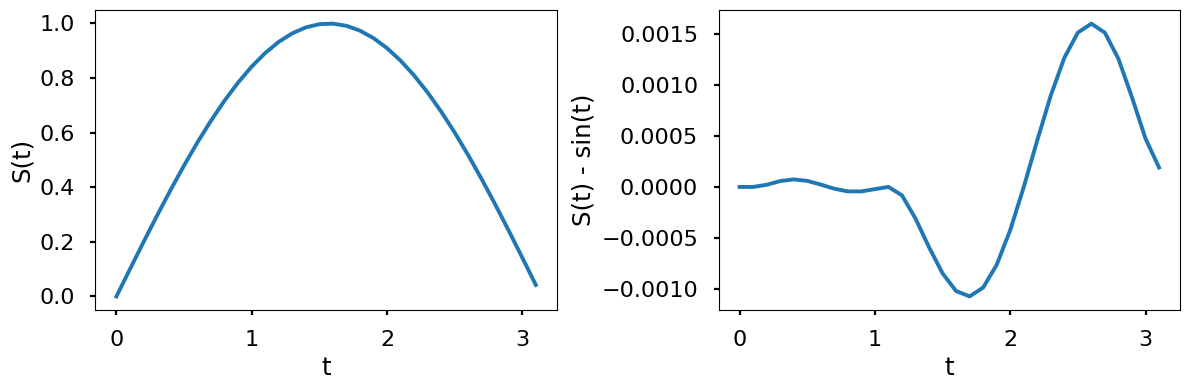

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

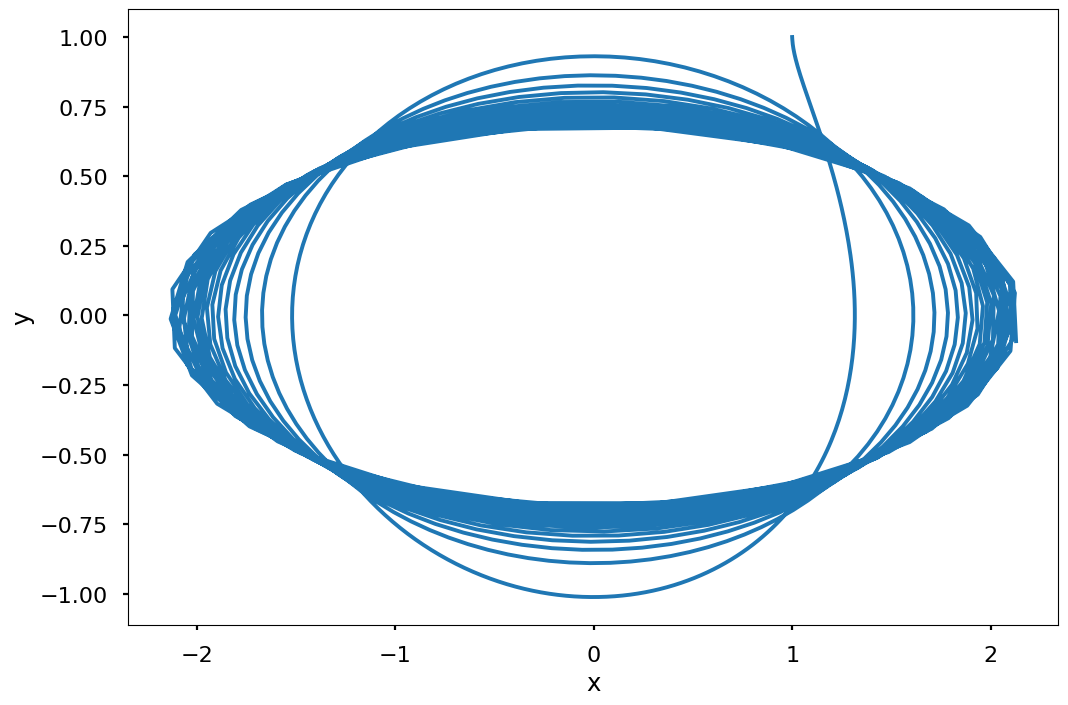

In [4]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()